In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import random
%matplotlib inline
import numpy as np
from math import sqrt

*Note here that the streaming history used to predict context and induced emotion are not the same.This is due to time constrainst
We were unable to download one of our own streming history from spotify before the project deadline. The sample streaming history given did not contain the needed audio features that our audio_features-emotion_classification model needed.
As a result, we had to minick our own streaming hisotry and grab song audio features from another data set. Because not every song in the audio features data set was available in the lyrics data set, and we faced limited time, we decided to use two different mimicked streaming histories for two two song emotion predictiong models. 

We applied the <lyrics-song_emotion_classification model> to our <induced_emotion prediction model> because it produces the same emotion scale. Though we have an emotion scale translation system through teh GEMS model, we thought that it would be best if we avoided emotion-scale translation as much as possible. 

we applied the <audio-feature-song_emotion_classification model> to our our <context_emotion prediction model> because the research paper which our context_emotion to song_emotion mapping is based upon took an overall-audio-feature approach to emotion classification. 

# Using song emotion to infer listener's emotional context

## context_emotion & song_emotion graph

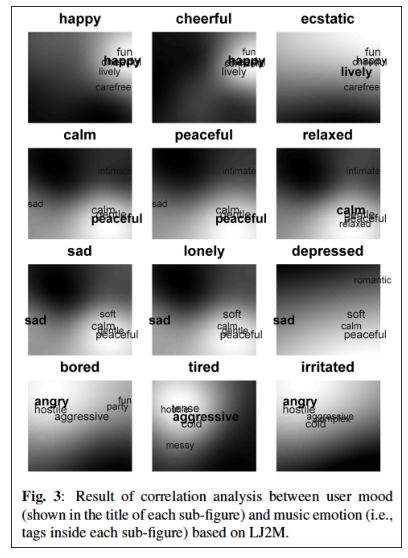

In [2]:
from PIL import Image
contextsong = Image.open("context_emotion_&_song_emotion.png")
fig = plt.figure()
fig.set_figwidth(7)
fig.set_figheight(12)
plt.yticks([])
plt.xticks([])
plt.imshow(contextsong)

## Map to GEMS

| Music Mood |    5    |    4    |    3    |
|------------|---------|---------|---------|
|   Amazement|Amazement|Amazement|         |
|   Solemnity|         |Amazement|         |
|  Tenderness|         |         | Calmness|
|   Nostalgia|         |         | Calmness|
|    Calmness| Calmness|  Sadness|Amazement|
|       Power|  Sadness|  Tension|         |
| Joyful act.|Amazement|         |  Tension|
|    Tension |  Tension|  Sadness|         |
|     Sadness|  Sadness|         | Calmness|


Due to the limited size of our audio-feature mood identification scale, we have to map to GEMS scale to the audio-feature mood identification scale (instead of the other way around). We don't map directly from the context_emotion & song_emotion graph to the audio-feature mood identification scale because feel find the GEMS scale to be the most apposite for both emotion expression and transition scale between different emotion classification systems. 

 *bellow is the code for the emotion prediction system if we were to map a music emotion classification scale as we originally intended. This code is not used in our model, but could serve as reference for further developments

 #Load the data
user_emotion_history = pd.read_excel (r'emotion_song_history.xlsx')

user_emotion_history["Amazement"] = 0
user_emotion_history["Calmness"] = 0
user_emotion_history["Sadness"] = 0
user_emotion_history["Tension"] = 0

user_emotion_history["Amazement_exist"] = 0
user_emotion_history["Calmness_exist"] = 0
user_emotion_history["Sadness_exist"] = 0
user_emotion_history["Tension_exist"] = 0

 #Amazement
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Amazement", "Amazement"] = 9
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Joyful_activation", "Amazement"] = 5
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Solemnity", "Amazement"] = 4
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Calmness", "Amazement"] = 3
 #Calmness
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Calmness", "Calmness"] = 5
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Tenderness", "Calmness"] = 3
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Nostalgia", "Calmness"] = 3
 #Sadness
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Sadness", "Sadness"] = 5
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Power", "Sadness"] = 5
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Calmness", "Sadness"] = 4
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Tension", "Sadness"] = 4
 #Tension
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Tension", "Tension"] = 5
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Power", "Tension"] = 4
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Joyful_activation", "Tension"] = 3

 #visualize the data
 plot 1:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)
ax1 = fig.add_subplot(111)

ax1.scatter(user_emotion_history.loc[user_emotion_history["Amazement"] > 0,"time"],
            user_emotion_history.loc[user_emotion_history["Amazement"] > 0,"Amazement"],
            s=100 * user_emotion_history.loc[user_emotion_history["Amazement"] > 0,"Amazement"],
            c='r', label='Amazement', alpha=0.5)
ax1.scatter(user_emotion_history.loc[user_emotion_history["Calmness"] > 0,"time"],
            user_emotion_history.loc[user_emotion_history["Calmness"] > 0,"Calmness"],
            s=100 * user_emotion_history.loc[user_emotion_history["Calmness"] > 0,"Calmness"],
            c='b', label='Calmness', alpha=0.5)
ax1.scatter(user_emotion_history.loc[user_emotion_history["Sadness"] > 0,"time"],
            user_emotion_history.loc[user_emotion_history["Sadness"] > 0,"Sadness"],
            s=100 * user_emotion_history.loc[user_emotion_history["Sadness"] > 0,"Sadness"],
            c='y', label='Sadness', alpha=0.5)
ax1.scatter(user_emotion_history.loc[user_emotion_history["Tension"] > 0,"time"],
            user_emotion_history.loc[user_emotion_history["Tension"] > 0,"Tension"],
            s=100 * user_emotion_history.loc[user_emotion_history["Tension"] > 0,"Tension"],
            c='g', label='Tension', alpha=0.5)

plt.legend(loc = "upper center");
plt.show()

 plot 2:
user_emotion_history["Amazement_exist"] = 0
user_emotion_history["Calmness_exist"] = 0
user_emotion_history["Sadness_exist"] = 0
user_emotion_history["Tension_exist"] = 0

user_emotion_history.loc[user_emotion_history["Amazement"] > 0,"Amazement_exist"] = 1
user_emotion_history.loc[user_emotion_history["Calmness"] > 0,"Calmness_exist"] = 1
user_emotion_history.loc[user_emotion_history["Sadness"] > 0,"Sadness_exist"] = 1
user_emotion_history.loc[user_emotion_history["Tension"] > 0,"Tension_exist"] = 1

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(user_emotion_history.loc[user_emotion_history["Amazement"] > 0,"time"],
            user_emotion_history.loc[user_emotion_history["Amazement"] > 0,"Amazement_exist"],
            s=100 * user_emotion_history.loc[user_emotion_history["Amazement"] > 0,"Amazement"]**2,
            c='r', label='Amazement', alpha=0.4)
ax1.scatter(user_emotion_history.loc[user_emotion_history["Calmness"] > 0,"time"],
            user_emotion_history.loc[user_emotion_history["Calmness"] > 0,"Calmness_exist"],
            s=100 * user_emotion_history.loc[user_emotion_history["Calmness"] > 0,"Calmness"]**2,
            c='b', label='Calmness', alpha=0.4)
ax1.scatter(user_emotion_history.loc[user_emotion_history["Sadness"] > 0,"time"],
            user_emotion_history.loc[user_emotion_history["Sadness"] > 0,"Sadness_exist"],
            s=100 * user_emotion_history.loc[user_emotion_history["Sadness"] > 0,"Sadness"]**2,
            c='y', label='Sadness', alpha=0.4)
ax1.scatter(user_emotion_history.loc[user_emotion_history["Tension"] > 0,"time"],
            user_emotion_history.loc[user_emotion_history["Tension"] > 0,"Tension_exist"],
            s=100 * user_emotion_history.loc[user_emotion_history["Tension"] > 0,"Tension"]**2,
            c='g', label='Tension', alpha=0.4)
ax1.set_yticks([])
fig.set_figwidth(20)
fig.set_figheight(5)
plt.legend(loc = "upper center", markerscale=0.4);
plt.show()

 plot 3:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(user_emotion_history["time"],user_emotion_history["Sadness"], c='y', label='Sadness')
plt.plot(user_emotion_history["time"],user_emotion_history["Tension"], c='g', label='Tension')
plt.plot(user_emotion_history["time"],user_emotion_history["Calmness"], c='b', label='Calmness')
plt.plot(user_emotion_history["time"],user_emotion_history["Amazement"], c='r', label='Amazement')

plt.title("Predicted Emotion Over Time")
plt.xlabel("time")
plt.ylabel("Probability Scale 0 - 12")
plt.ylim(0, 10)

plt.legend()
plt.show()

 plot 4:
width = 0.8
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)
ax = fig.add_axes([0,0,1,1])
ax.bar(user_emotion_history["time"], user_emotion_history["Sadness"], width, color='y', label='Sadness',alpha=0.7)
ax.bar(user_emotion_history["time"], user_emotion_history["Tension"], width, color='g', label='Tension',alpha=0.7)
ax.bar(user_emotion_history["time"], user_emotion_history["Calmness"], width, color='b', label='Calmness',alpha=0.7)
ax.bar(user_emotion_history["time"], user_emotion_history["Amazement"], width, color='r', label='Amazement',alpha=0.7)

ax.set_xlabel("Time")
ax.set_ylabel('Probability Scale 3-5')
ax.set_title("Predicted Emotion Over Time")

ax.legend()
plt.show()

## translated mapping

	Listener Mood						
Music Mood	5			4			3
Romantic 							Calmness
Nostalgic							Calmness
Artsy	Sadness	Amazement	Amazement	Amazement	Amazement	Tension 	Tension 
 Sad	Sadness	Tension		Sadness			Calmness
Chill	Calmness			Sadness			Amazement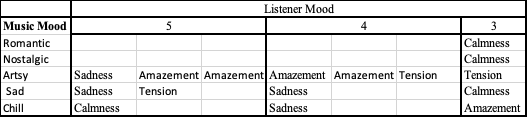

In [3]:
# Load the data
user_emotion_history = pd.read_csv("DEMO.csv")
user_emotion_history = user_emotion_history.drop(["Artist", "Danceability", "Speechiness",
                                                  "Acousticness","Liveness", "Loudness (dB)"], axis=1)
user_emotion_history = user_emotion_history.rename(columns={'Title': "song_name", 'mood': "song_emotion"})
user_emotion_history.head(5)

,time,song_name,song_emotion
0,2021/1/23 21:30,You Got It,Sad
1,2021/1/23 21:34,Heaven,Artsy
2,2021/1/29 14:31,Oerend Hard,Romantic
3,2021/1/29 14:49,Try a Little Tenderness,Romantic
4,2021/1/29 14:57,Watskeburt?!,Romantic


## Translate song memory list to listener emotion prediction list

In [4]:
user_emotion_history["Amazement"] = 0
user_emotion_history["Calmness"] = 0
user_emotion_history["Sadness"] = 0
user_emotion_history["Tension"] = 0


#Calmness
user_emotion_history.loc[user_emotion_history["song_emotion"] == 'Romantic', 'Calmness'] = 3
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Nostalgic", "Calmness"] = 3
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Chill", "Calmness"] = 5

#Sadness
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Sad", "Sadness"] = 9
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Chill", "Sadness"] = 3
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Artsy", "Sadness"] = 5

#Tension
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Sad", "Tension"] = 5
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Artsy", "Tension"] = 7

#Amazement
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Artsy", "Amazement"] = 18
user_emotion_history.loc[user_emotion_history["song_emotion"] == "Chill", "Amazement"] = 3


## Visualize the data

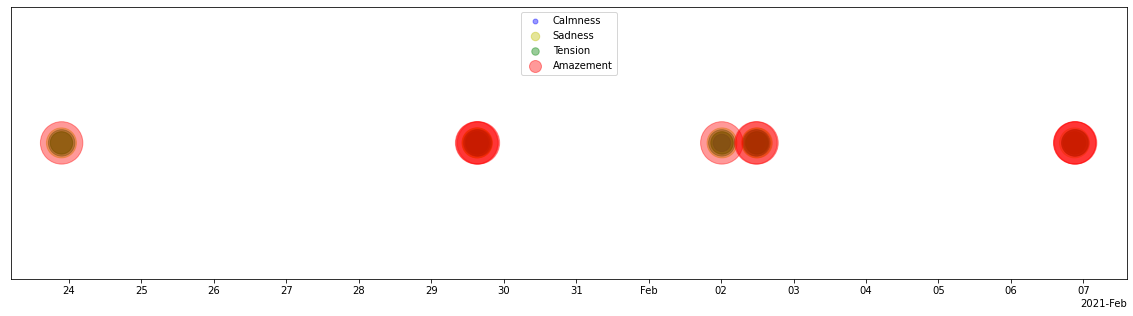

In [5]:
import matplotlib.dates as mdates
user_emotion_history["Amazement_exist"] = 1
user_emotion_history["Calmness_exist"] = 1
user_emotion_history["Sadness_exist"] = 1
user_emotion_history["Tension_exist"] = 1

user_emotion_history.loc[:,"time"] = user_emotion_history["time"].astype("string")
user_emotion_history.loc[:,"time"] = user_emotion_history.loc[:,"time"].str.replace("/", "-")
user_emotion_history.loc[:,"time"] = pd.to_datetime(user_emotion_history["time"], dayfirst=True)

fig = plt.figure()
ax1 = fig.add_subplot(111)

locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
formatter = mdates.ConciseDateFormatter(locator)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

ax1.scatter(user_emotion_history["time"],user_emotion_history["Calmness_exist"],
            s=100 * user_emotion_history["Calmness"],
            c='b', label='Calmness', alpha=0.4)
ax1.scatter(user_emotion_history["time"],user_emotion_history["Sadness_exist"],
            s=100 * user_emotion_history["Sadness"],
            c='y', label='Sadness', alpha=0.4)
ax1.scatter(user_emotion_history["time"],user_emotion_history["Tension_exist"],
            s=100 * user_emotion_history["Tension"],
            c='g', label='Tension', alpha=0.4)
ax1.scatter(user_emotion_history["time"],user_emotion_history["Amazement_exist"],
            s=100 * user_emotion_history["Amazement"],
            c='r', label='Amazement', alpha=0.4)


ax1.set_yticks([])
fig.set_figwidth(20)
fig.set_figheight(5)
plt.legend(loc = "upper center", markerscale=0.4);
plt.show()

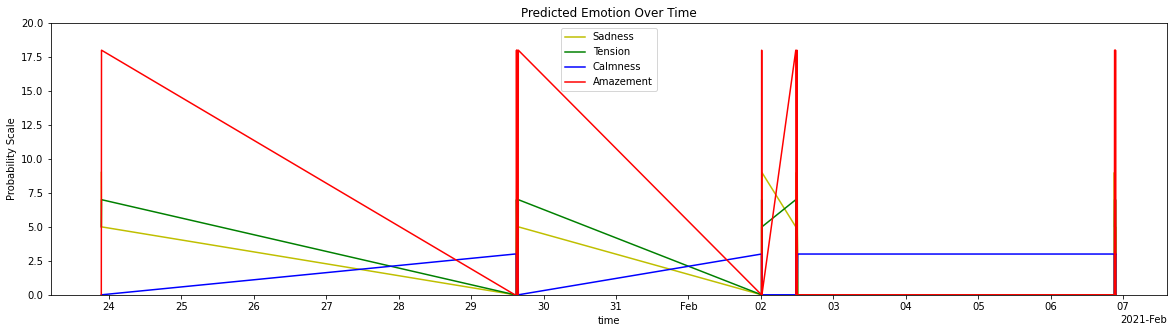

In [6]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)

ax1 = fig.add_subplot(111)

locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
formatter = mdates.ConciseDateFormatter(locator)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

ax1.plot(user_emotion_history["time"],user_emotion_history["Sadness"], c='y', label='Sadness')
ax1.plot(user_emotion_history["time"],user_emotion_history["Tension"], c='g', label='Tension')
ax1.plot(user_emotion_history["time"],user_emotion_history["Calmness"], c='b', label='Calmness')
ax1.plot(user_emotion_history["time"],user_emotion_history["Amazement"], c='r', label='Amazement')

plt.title("Predicted Emotion Over Time")
plt.xlabel("time")
plt.ylabel("Probability Scale")
plt.ylim(0, 20)

plt.legend()
plt.show()

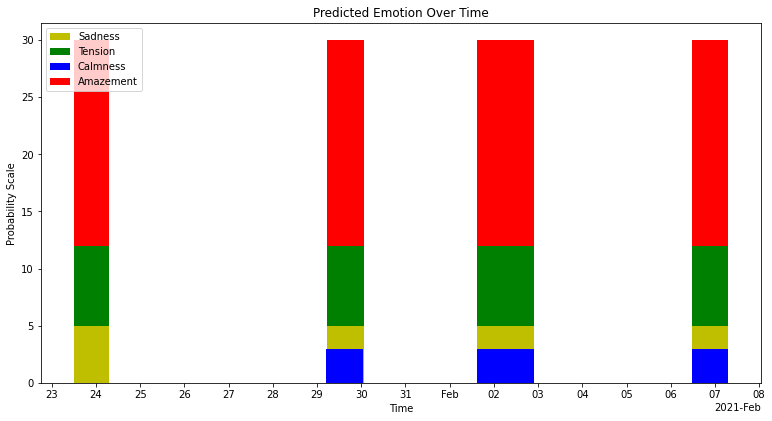

In [7]:

width = 0.8
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)
ax = fig.add_axes([0,0,1,1])

locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)


ax.bar(user_emotion_history["time"], user_emotion_history["Sadness"], width, color='y', label='Sadness',alpha=1)
ax.bar(user_emotion_history["time"], user_emotion_history["Tension"], width, color='g', label='Tension',alpha=1,
       bottom=user_emotion_history["Sadness"])
ax.bar(user_emotion_history["time"], user_emotion_history["Calmness"], width, color='b', label='Calmness',alpha=1,
       bottom=user_emotion_history["Sadness"]+user_emotion_history["Tension"])
ax.bar(user_emotion_history["time"], user_emotion_history["Amazement"], width, color='r', label='Amazement',alpha=1,
       bottom=user_emotion_history["Sadness"]+user_emotion_history["Tension"]+user_emotion_history["Calmness"])

ax.set_xlabel("Time")
ax.set_ylabel("Probability Scale")
ax.set_title("Predicted Emotion Over Time")

ax.legend()
plt.show()


# Predicting listener's induced emotion

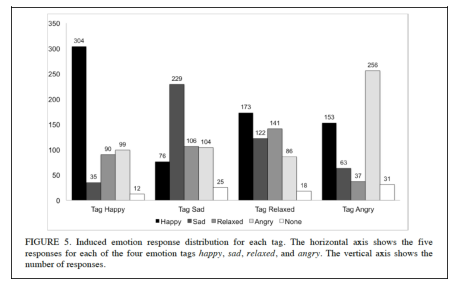

In [8]:
from PIL import Image
coorelation = Image.open("Induced and tag.png")
GEMS = Image.open("GEMS.png")
variance_mapping = Image.open("rough_mapping_variance_emotion.png")
fig = plt.figure()
fig.set_figwidth(18)
fig.set_figheight(5)
plt.yticks([])
plt.xticks([])
plt.imshow(coorelation)

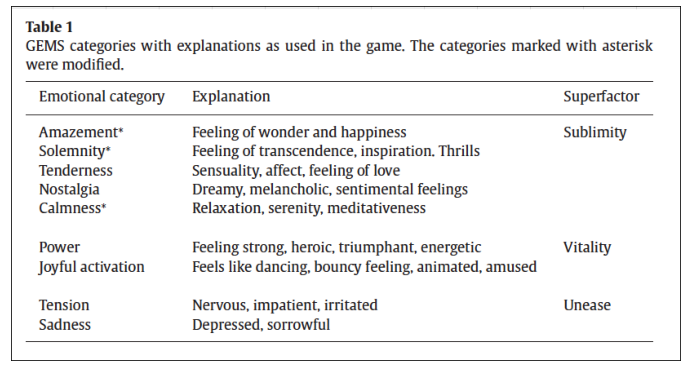

In [9]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(7)
plt.yticks([])
plt.xticks([])
plt.imshow(GEMS)

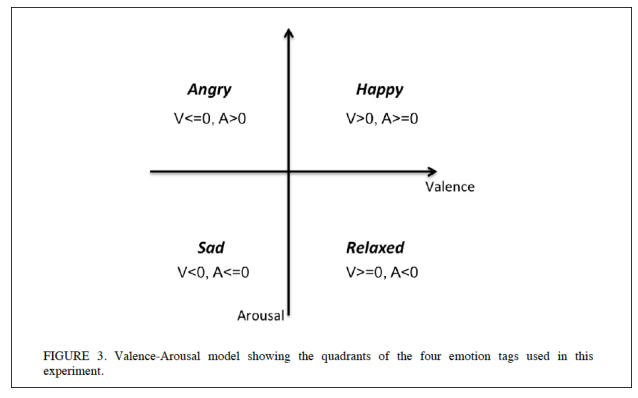

In [10]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(7)
plt.yticks([])
plt.xticks([])
plt.imshow(variance_mapping)

### In this section, we use an emotional mapping using lyrics into the 4 categories of Happy, Sad, Relaxed, and Angry. Below is a mapping from the GEMS scale to the Happy, Sad, Relaxed, and Angry scale. This is not used in our model but might be beneficial for reference

|       Happy     |    Sad    |  Relaxed  |   Angry   |
|-----------------|-----------|-----------|-----------|
|   Amazement     |  Sadness  |  Calmness |   Power   |
|Joyful_activation|           | Nostalgia |   Tension |
|    Solemnity    |           | Tenderness|           |

#Load the data
Induced_emotion_history = pd.read_excel (r'emotion_song_history.xlsx')

Induced_emotion_history["translated_music_emotion"] = 0
 Induced_emotion_history["Happy"] = 0
 Induced_emotion_history["Sad"] = 0
 Induced_emotion_history["Relaxed"] = 0
 Induced_emotion_history["Angry"] = 0
 Induced_emotion_history["None"] = 0

Induced_emotion_history.loc[Induced_emotion_history["song_emotion"] == "Amazement", "translated_music_emotion"] = "Happy"
Induced_emotion_history.loc[Induced_emotion_history["song_emotion"] == "Joyful_activation", "translated_music_emotion"] = "Happy"
Induced_emotion_history.loc[Induced_emotion_history["song_emotion"] == "Solemnity", "translated_music_emotion"] = "Happy"
Induced_emotion_history.loc[Induced_emotion_history["song_emotion"] == "Sadness", "translated_music_emotion"] = "Sadness"
Induced_emotion_history.loc[Induced_emotion_history["song_emotion"] == "Calmness", "translated_music_emotion"] = "Relaxed"
Induced_emotion_history.loc[Induced_emotion_history["song_emotion"] == "Nostalgia", "translated_music_emotion"] = "Relaxed"
Induced_emotion_history.loc[Induced_emotion_history["song_emotion"] == "Tenderness", "translated_music_emotion"] = "Relaxed"
Induced_emotion_history.loc[Induced_emotion_history["song_emotion"] == "Power", "translated_music_emotion"] = "Angry"
Induced_emotion_history.loc[Induced_emotion_history["song_emotion"] == "Tension", "translated_music_emotion"] = "Angry"

In [11]:
#load data
Induced_emotion_history = pd.read_csv("Output.csv")
Induced_emotion_history = Induced_emotion_history.drop(["artistName"], axis=1)
Induced_emotion_history = Induced_emotion_history.rename(columns={'endTime': "time",
                                                            'trackName': "song_name", "Emotion": "translated_music_emotion"})
Induced_emotion_history.head(5)

,time,song_name,translated_music_emotion
0,2021/1/23 21:30,Happiness In Liquid Form,happy
1,2021/1/23 21:34,Tieduprightnow,relaxed
2,2021/1/29 14:31,Somewhere Else,sad
3,2021/1/29 14:49,Can't Help Falling in Love,happy
4,2021/1/29 14:57,"Suite (From ""My Sister's Keeper"")",angry


In [12]:
Induced_emotion_history.loc[Induced_emotion_history["translated_music_emotion"] == "happy",
                            ["Happy", "Sad", "Relaxed", "Angry", "None"]]= [0.562963, 0.064815, 0.166667,0.183333, 0.22222]
Induced_emotion_history.loc[Induced_emotion_history["translated_music_emotion"] == "sad",
                            ["Happy", "Sad", "Relaxed", "Angry", "None"]]= [0.140741, 0.424074, 0.196296,0.192593, 0.046296]
Induced_emotion_history.loc[Induced_emotion_history["translated_music_emotion"] == "relaxed",
                            ["Happy", "Sad", "Relaxed", "Angry", "None"]]= [0.32037, 0.225926, 0.261111,0.159259, 0.033333]
Induced_emotion_history.loc[Induced_emotion_history["translated_music_emotion"] == "angry",
                            ["Happy", "Sad", "Relaxed", "Angry", "None"]]= [0.283333, 0.116667, 0.068519,0.474074, 0.057407]

In [13]:
Induced_emotion_history.loc[:,"time"] = Induced_emotion_history["time"].astype("string")
Induced_emotion_history.loc[:,"time"] = Induced_emotion_history.loc[:,"time"].str.replace("/", "-")
Induced_emotion_history.loc[:,"time"] = pd.to_datetime(Induced_emotion_history["time"], dayfirst=True)

## Visualize the predictions

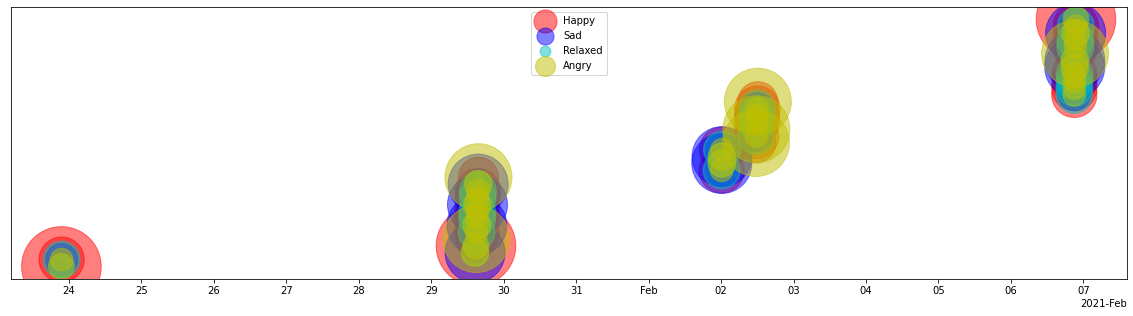

In [14]:

fig = plt.figure()
ax1 = fig.add_subplot(111)

locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
formatter = mdates.ConciseDateFormatter(locator)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

ax1.scatter(Induced_emotion_history["time"],
            Induced_emotion_history.index,
            s=200 * (Induced_emotion_history["Happy"]*10)**2,
            c='r', label='Happy', alpha=0.5)
ax1.scatter(Induced_emotion_history["time"],
            Induced_emotion_history.index,
            s=200 * (Induced_emotion_history["Sad"]*10)**2,
            c='b', label='Sad', alpha=0.5)
ax1.scatter(Induced_emotion_history["time"],
            Induced_emotion_history.index,
            s=200 * (Induced_emotion_history["Relaxed"]*10)**2,
            c='c', label='Relaxed', alpha=0.5)
ax1.scatter(Induced_emotion_history["time"],
            Induced_emotion_history.index,
            s=200 * (Induced_emotion_history["Angry"]*10)**2,
            c='y', label='Angry', alpha=0.5)

ax1.set_yticks([])
fig.set_figwidth(20)
fig.set_figheight(5)
plt.legend(loc = "upper center", markerscale=0.4);
plt.show()

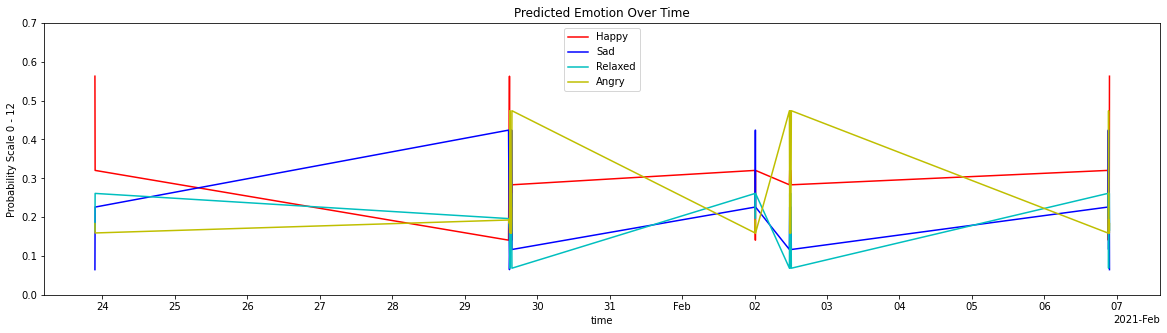

In [15]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)

ax1 = fig.add_subplot(111)

locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
formatter = mdates.ConciseDateFormatter(locator)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

ax1.plot(Induced_emotion_history["time"],Induced_emotion_history["Happy"], c='r', label='Happy')
ax1.plot(Induced_emotion_history["time"],Induced_emotion_history["Sad"], c='b', label='Sad')
ax1.plot(Induced_emotion_history["time"],Induced_emotion_history["Relaxed"], c='c', label='Relaxed')
ax1.plot(Induced_emotion_history["time"],Induced_emotion_history["Angry"], c='y', label='Angry')

plt.title("Predicted Emotion Over Time")
plt.xlabel("time")
plt.ylabel("Probability Scale 0 - 12")
plt.ylim(0, 0.7)

plt.legend()
plt.show()

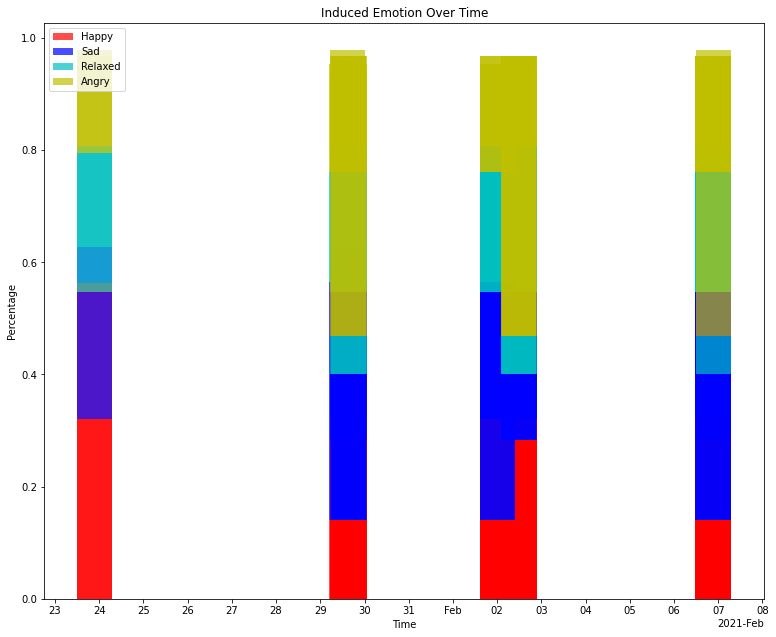

In [16]:
width = 0.8
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)
ax = fig.add_axes([0,0,1,1])

locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.bar(Induced_emotion_history["time"], Induced_emotion_history["Happy"], width, color='r', label='Happy',alpha=0.7)
ax.bar(Induced_emotion_history["time"], Induced_emotion_history["Sad"], width, color='b', label='Sad',alpha=0.7,
       bottom=Induced_emotion_history["Happy"])
ax.bar(Induced_emotion_history["time"], Induced_emotion_history["Relaxed"], width, color='c', label='Relaxed',alpha=0.7,
       bottom=Induced_emotion_history["Happy"]+Induced_emotion_history["Sad"])
ax.bar(Induced_emotion_history["time"], Induced_emotion_history["Angry"], width, color='y', label='Angry',alpha=0.7,
       bottom=Induced_emotion_history["Happy"]+Induced_emotion_history["Sad"]+Induced_emotion_history["Relaxed"])

ax.set_xlabel("Time")
ax.set_ylabel('Percentage')
ax.set_title("Induced Emotion Over Time")

ax.legend()
plt.show()


## In the section bellow we will focus on probability representations of context and induced emotions

 *NOTE: the predicted context emotion is not offered on a proprobability bases, but instead on an intensity scale due to lack of data. For the purpose of this section we will translate predicted context emotion into a probability scale

In [17]:
context = user_emotion_history[["time", "Amazement", "Calmness","Sadness", "Tension"]]
context = context.set_index("time")
temp = context.sum(axis=1)
context = context.div(temp, axis="index")


## Visualizing potential listener emotion before a particular song

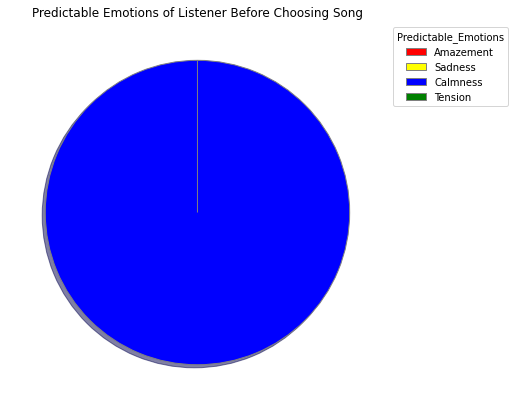

In [18]:
Sample = context.sample(1)
Predictable_Emotions = ["Amazement", "Sadness","Calmness","Tension"]  
data = np.concatenate((Sample["Amazement"].values,Sample["Sadness"].values, 
                    Sample["Calmness"].values,Sample["Tension"].values))
colors = ( "red", "yellow", "blue",
          "green")
wp = { 'linewidth' : 1, 'edgecolor' : "grey" }

fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts= ax.pie(data,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
  

ax.legend(wedges, Predictable_Emotions,
          title ="Predictable_Emotions", 
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax.set_title("Predictable Emotions of Listener Before Choosing Song")
plt.show()

## Visualize Induced Emotion at a point of time

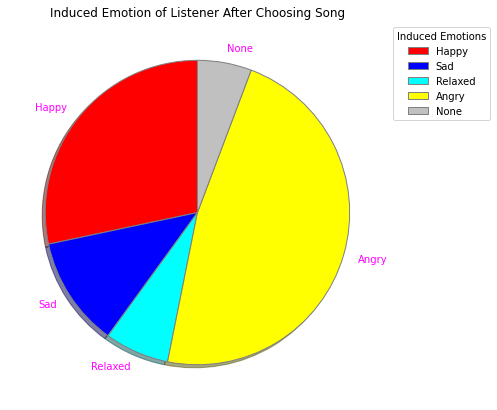

In [19]:
Sample = Induced_emotion_history.sample(1)
Predictable_Emotions = ["Happy", "Sad","Relaxed","Angry", "None"]  
data = np.concatenate((Sample["Happy"].values,Sample["Sad"].values, 
                    Sample["Relaxed"].values,Sample["Angry"].values, Sample["None"].values))

colors = ( "red", "blue", "cyan",
          "yellow", "silver")
wp = { 'linewidth' : 1, 'edgecolor' : "grey" }

fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts= ax.pie(data,labels = Predictable_Emotions,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"), normalize=False)
  

ax.legend(wedges, Predictable_Emotions,
          title ="Induced Emotions", 
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax.set_title("Induced Emotion of Listener After Choosing Song")
plt.show()

In [20]:
induced = Induced_emotion_history.drop(["song_name", "translated_music_emotion","None"], axis=1)
induced.loc[:,"time"] = induced["time"].astype("string")
induced.loc[:,"time"] = induced.loc[:,"time"].str.replace("/", "-")
induced.loc[:,"time"] = pd.to_datetime(induced["time"], dayfirst=True)
induced = induced.set_index("time")

In [21]:
from pandas.tseries.offsets import DateOffset
before = user_emotion_history.drop(["song_name", "song_emotion", "Amazement_exist", "Calmness_exist", "Sadness_exist", "Tension_exist"], axis=1)
before.loc[:,"time"] = before["time"].astype("string")
before.loc[:,"time"] = before.loc[:,"time"].str.replace("/", "-")
before.loc[:,"time"] = pd.to_datetime(before["time"], dayfirst=True)
before["time"] = before["time"] + DateOffset(minutes=3)
before = before.set_index("time")
scale = before.sum(axis=1).max()
before = before.div(scale, axis="index")

In [22]:
combined = before.append(induced)
combined = combined.fillna(0)
combined["place_holder"] = 0
combined

,Amazement,Calmness,Sadness,Tension,Happy,Sad,Relaxed,Angry,place_holder
time,,,,,,,,,
2021-01-23 21:33:00,0.0,0.0,0.300000,0.166667,0.000000,0.000000,0.000000,0.000000,0
2021-01-23 21:37:00,0.6,0.0,0.166667,0.233333,0.000000,0.000000,0.000000,0.000000,0
2021-01-29 14:34:00,0.0,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2021-01-29 14:52:00,0.0,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2021-01-29 15:00:00,0.0,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...
2021-02-06 21:21:00,0.0,0.0,0.000000,0.000000,0.320370,0.225926,0.261111,0.159259,0
2021-02-06 21:24:00,0.0,0.0,0.000000,0.000000,0.320370,0.225926,0.261111,0.159259,0
2021-02-06 21:27:00,0.0,0.0,0.000000,0.000000,0.140741,0.424074,0.196296,0.192593,0


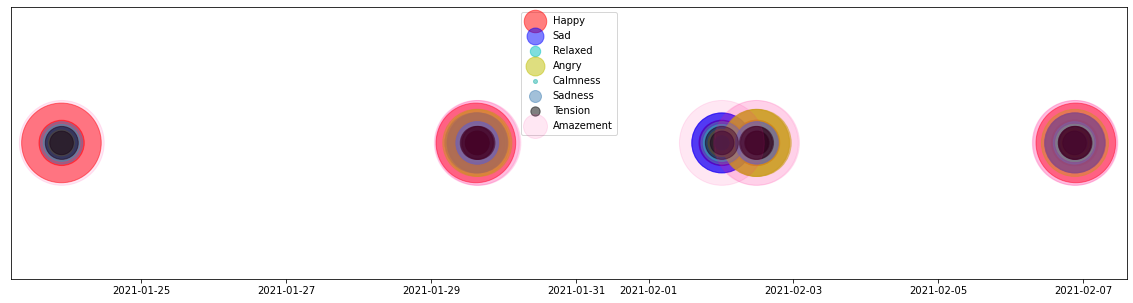

In [23]:

fig = plt.figure()
ax1 = fig.add_subplot(111)

#locator = mdates.AutoDateLocator(minticks=5, maxticks=5)
#formatter = mdates.ConciseDateFormatter(locator)
#ax1.xaxis.set_major_locator(locator)
#ax1.xaxis.set_major_formatter(formatter)

ax1.scatter(combined.index,
            combined["place_holder"],
            s=200 * (combined["Happy"]*10)**2,
            c='r', label='Happy', alpha=0.5)
ax1.scatter(combined.index,
            combined["place_holder"],
            s=200 * (combined["Sad"]*10)**2,
            c='b', label='Sad', alpha=0.5)
ax1.scatter(combined.index,
            combined["place_holder"],
            s=200 * (combined["Relaxed"]*10)**2,
            c='c', label='Relaxed', alpha=0.5)
ax1.scatter(combined.index,
            combined["place_holder"],
            s=200 * (combined["Angry"]*10)**2,
            c='y', label='Angry', alpha=0.5)

ax1.scatter(combined.index,
            combined["place_holder"],
            s=200 * (combined["Calmness"]*10)**2,
            c='lightseagreen', label='Calmness', alpha=0.5)
ax1.scatter(combined.index,
            combined["place_holder"],
            s=200 * (combined["Sadness"]*10)**2,
            c='steelblue', label='Sadness', alpha=0.5)
ax1.scatter(combined.index,
            combined["place_holder"],
            s=200 * (combined["Tension"]*10)**2,
            c='k', label='Tension', alpha=0.5)
ax1.scatter(combined.index,
            combined["place_holder"],
            s=200 * (combined["Amazement"]*10)**2,
            c='deeppink', label='Amazement', alpha=0.1)


ax1.set_yticks([])
fig.set_figwidth(20)
fig.set_figheight(5)
plt.legend(loc = "upper center", markerscale=0.4);
plt.show()